In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
players = pd.read_csv('nba-players.csv',index_col=0)

## Data Cleaning and Insight

In [159]:
# drop duplicate
players = players.drop_duplicates()
players = players.reset_index(drop=True)

In [5]:
# Dataframe information
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1328 non-null   object 
 1   gp           1328 non-null   int64  
 2   min          1328 non-null   float64
 3   pts          1328 non-null   float64
 4   fgm          1328 non-null   float64
 5   fga          1328 non-null   float64
 6   fg           1328 non-null   float64
 7   3p_made      1328 non-null   float64
 8   3pa          1328 non-null   float64
 9   3p           1328 non-null   float64
 10  ftm          1328 non-null   float64
 11  fta          1328 non-null   float64
 12  ft           1328 non-null   float64
 13  oreb         1328 non-null   float64
 14  dreb         1328 non-null   float64
 15  reb          1328 non-null   float64
 16  ast          1328 non-null   float64
 17  stl          1328 non-null   float64
 18  blk          1328 non-null   float64
 19  tov   

In [6]:
# Basic statistic of all features
players.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.177485,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.621235
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.071943,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485262
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
players.isna().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [8]:
# Target Distribution
players['target_5yrs'].value_counts()

1    825
0    503
Name: target_5yrs, dtype: int64

### Logistic regression analysis

In [282]:
pd.DataFrame([players_X.columns, LogisticRegression().fit(player_X_scale, players_y).coef_[0]]).T.sort_values([1])

,0,1
7,3pa,-0.701845
1,min,-0.25857
13,dreb,-0.223884
16,stl,-0.147981
18,tov,-0.125611
4,fga,0.177443
8,3p,0.299928
3,fgm,0.314557
10,fta,0.407491
2,pts,0.427471


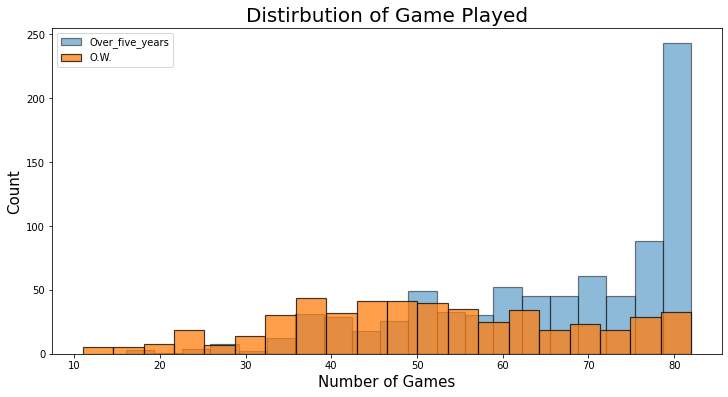

In [373]:
# Game played
plt.hist(players[players['target_5yrs']==1]['gp'], label = 'Over_five_years', bins = 20,
        edgecolor='black', linewidth=1.2, alpha = 0.5)
plt.hist(players[players['target_5yrs']==0]['gp'], label = 'O.W.', bins=20,
        edgecolor='black', linewidth=1.2, alpha = 0.75)
plt.legend()
plt.title('Distirbution of Game Played', fontsize = 20)
plt.xlabel('Number of Games', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('game_played.png')

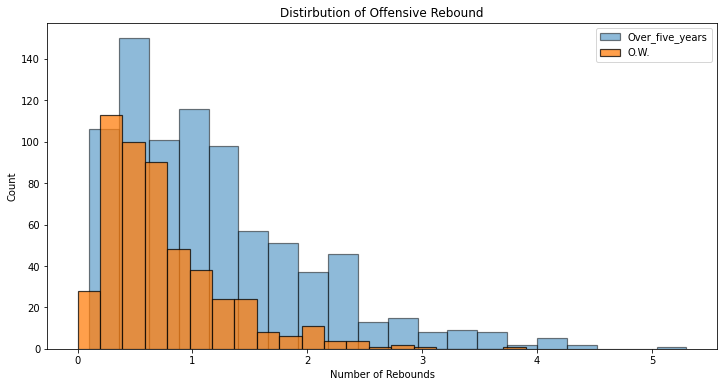

In [327]:
# offensive rebounds
plt.hist(players[players['target_5yrs']==1]['oreb'], label = 'Over_five_years', bins = 20,
        edgecolor='black', linewidth=1.2, alpha = 0.5)
plt.hist(players[players['target_5yrs']==0]['oreb'], label = 'O.W.', bins=20,
        edgecolor='black', linewidth=1.2, alpha = 0.75)
plt.legend()
plt.title('Distirbution of Offensive Rebound')
plt.xlabel('Number of Rebounds')
plt.ylabel('Count')
plt.savefig('oreb.png')

## Machine Learning Without Feature engineering

In [92]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, PrecisionRecallDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
import multiprocessing

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(players.iloc[:,1:20], players.iloc[:,20], 
                                                    test_size=0.2, random_state=42)

In [335]:
# Decision Tree
tree_grid = {'max_depth':[3,4,5,6],
            'min_samples_split':[2,3,4],
            'max_features':['auto', 'sqrt', 'log2', None]}

DT_gs = GridSearchCV(estimator=DecisionTreeClassifier() , param_grid=tree_grid ,
        scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)

DT_gs.fit(X_train, Y_train)
DT_best = DT_gs.best_estimator_
DT_best.fit(X_train, Y_train)

print('Best para: ', DT_gs.best_params_)
print('accuracy: ', accuracy_score(DT_best.predict(X_test), Y_test))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best para:  {'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 2}
accuracy:  0.7255639097744361


In [336]:
print(classification_report(Y_test, DT_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54        88
           1       0.77      0.85      0.81       178

    accuracy                           0.73       266
   macro avg       0.69      0.66      0.67       266
weighted avg       0.71      0.73      0.72       266



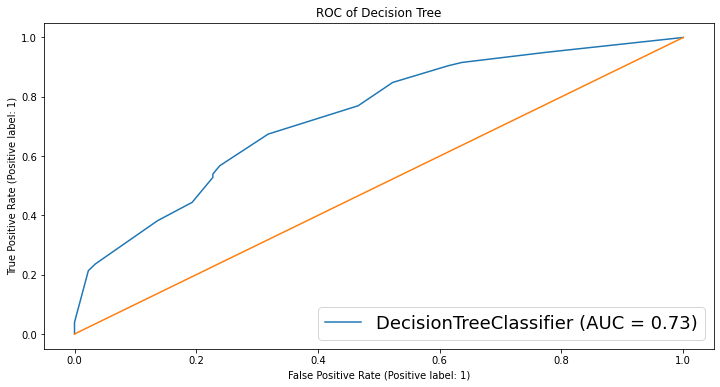

In [508]:
metrics.plot_roc_curve(DT_best, X_test, Y_test)
plt.title('ROC of Decision Tree')
plt.plot([0, 1], [0,1])
plt.legend(fontsize = 18, loc='lower right')

In [534]:
# Random Forest
forest_grid = { 'n_estimators':[1000, 200, 300, 500],
               'max_depth':[6,7,8],
               'max_features':['auto', 'sqrt', 'log2', None]
}

RF_gs = GridSearchCV(estimator=RandomForestClassifier() , param_grid=forest_grid ,
        scoring='accuracy', cv=3, n_jobs=multiprocessing.cpu_count(), verbose=1)

RF_gs.fit(X_train, Y_train)
RF_best = RF_gs.best_estimator_
RF_best.fit(X_train, Y_train)

print('Best para: ', RF_gs.best_params_)
print('accuracy: ', accuracy_score(RF_best.predict(X_test), Y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best para:  {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
accuracy:  0.7443609022556391


In [535]:
print(classification_report(Y_test, RF_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        88
           1       0.81      0.81      0.81       178

    accuracy                           0.74       266
   macro avg       0.71      0.71      0.71       266
weighted avg       0.74      0.74      0.74       266



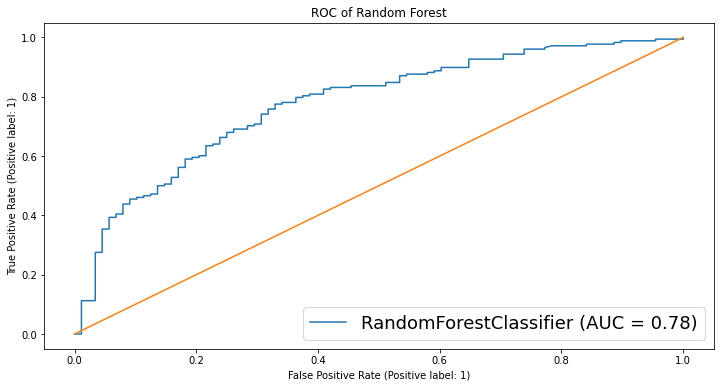

In [538]:
metrics.plot_roc_curve(RF_best, X_test, Y_test)
plt.title('ROC of Random Forest')
plt.plot([0, 1], [0,1])
plt.legend(fontsize=18, loc='lower right')

In [346]:
# Feature Importance
RF_best.feature_importances_

array([0.15850821, 0.05721523, 0.0770334 , 0.07644737, 0.04402747,
       0.0704441 , 0.01659836, 0.02593877, 0.03801059, 0.06358431,
       0.05510574, 0.05294517, 0.05114716, 0.04311985, 0.06567621,
       0.02880866, 0.02103888, 0.02577527, 0.02857526])

In [344]:
# Gradient Boosting
boosting_grid = {'loss':['exponential', 'deviance'], #, 'exponential', deviance
                 'learning_rate':[0.1, 0.05, 0.01],
                 'n_estimators':[100, 200, 300],
                 'max_depth':[2, 3, 4],
                 'max_features':['auto', 'sqrt', 'log2']
}

GB_gs = GridSearchCV(estimator=GradientBoostingClassifier() , param_grid=boosting_grid ,
        scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)

GB_gs.fit(X_train, Y_train)
GB_best = GB_gs.best_estimator_
GB_best.fit(X_train, Y_train)

print('Best para: ', GB_gs.best_params_)
print('accuracy: ', accuracy_score(GB_best.predict(X_test), Y_test))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best para:  {'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 300}
accuracy:  0.7406015037593985


In [345]:
print(classification_report(Y_test, GB_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        88
           1       0.79      0.83      0.81       178

    accuracy                           0.74       266
   macro avg       0.71      0.69      0.70       266
weighted avg       0.73      0.74      0.74       266



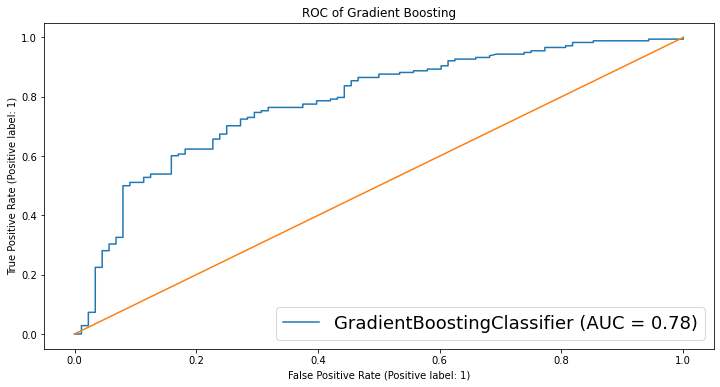

In [506]:
metrics.plot_roc_curve(GB_best, X_test, Y_test)
plt.title('ROC of Gradient Boosting')
plt.plot([0, 1], [0,1])
plt.legend(fontsize=18)

## Machine Learning with Feature Engineering

In [160]:
players_X = players.iloc[:,1:20]
players_y = players.iloc[:,20]

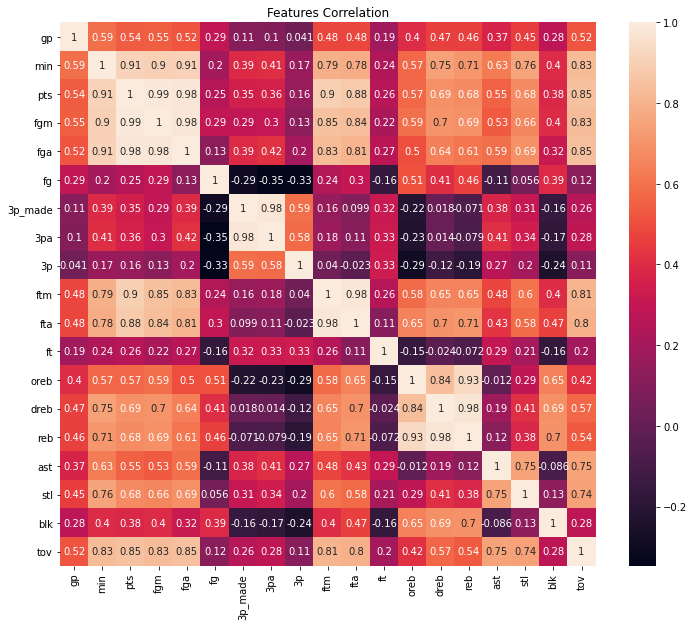

In [328]:
# Correlation between features
plt.figure(figsize=(12,10))
plt.title('Features Correlation')
sns.heatmap(players_X.corr(), annot=True)
plt.savefig('Correlation.png')

fgm-pts, fga-pts, fga-fgm, 3pa-3p_made, fta-ftm, reb-dreb, have really high correlation which are over 0.95

In [349]:
# Random Forest with scaled X
forest_grid = { 'n_estimators':[100, 200, 300, 500],
               'max_depth':[6,7,8],
               'max_features':['auto', 'sqrt', 'log2', None]
}

RF_gs = GridSearchCV(estimator=RandomForestClassifier() , param_grid=forest_grid ,
        scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)

RF_gs.fit(player_X_scale, players_y)
RF_best2 = RF_gs.best_estimator_
RF_best2.fit(player_X_scale, players_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=300)

In [407]:
rf_import

,features,importances
0,gp,0.162264
3,fgm,0.0804686
2,pts,0.0786687
5,fg,0.0758629
1,min,0.0580123
9,ftm,0.0569283
11,ft,0.054212
4,fga,0.0531935
14,reb,0.0499257
12,oreb,0.0471878


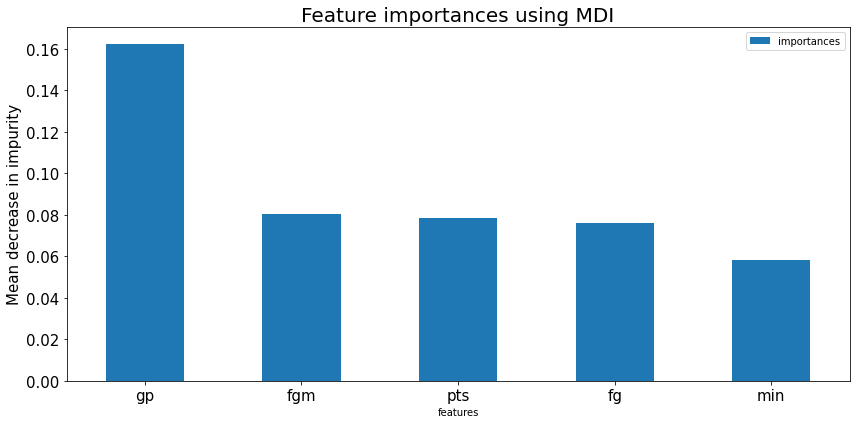

In [372]:
# Feature importances
rf_import = pd.DataFrame([players_X.columns, RF_best2.feature_importances_]).T
rf_import.columns = ['features', 'importances']
rf_import = rf_import.sort_values('importances', ascending=False)

fig, ax = plt.subplots()
rf_import.iloc[:5].plot.bar(x = 'features',ax=ax, fontsize=15)
ax.set_title("Feature importances using MDI", fontsize = 20)
ax.set_ylabel("Mean decrease in impurity", fontsize = 15)
plt.xticks(rotation=0)
fig.tight_layout()

Text(0, 0.5, 'Count')

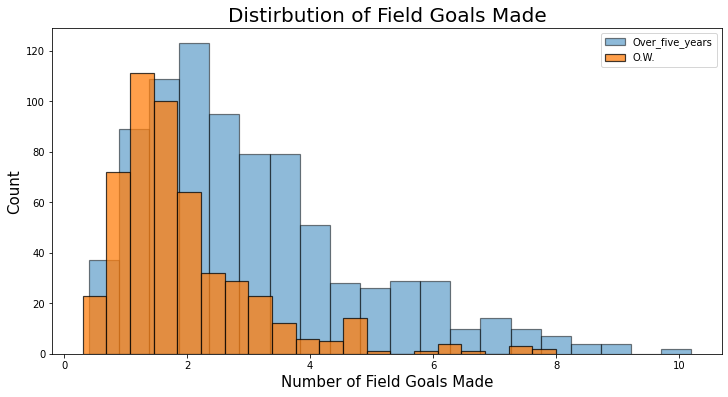

In [375]:
# Field Goals Made
plt.hist(players[players['target_5yrs']==1]['fgm'], label = 'Over_five_years', bins = 20,
        edgecolor='black', linewidth=1.2, alpha = 0.5)
plt.hist(players[players['target_5yrs']==0]['fgm'], label = 'O.W.', bins=20,
        edgecolor='black', linewidth=1.2, alpha = 0.75)
plt.legend()
plt.title('Distirbution of Field Goals Made', fontsize = 20)
plt.xlabel('Number of Field Goals Made', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

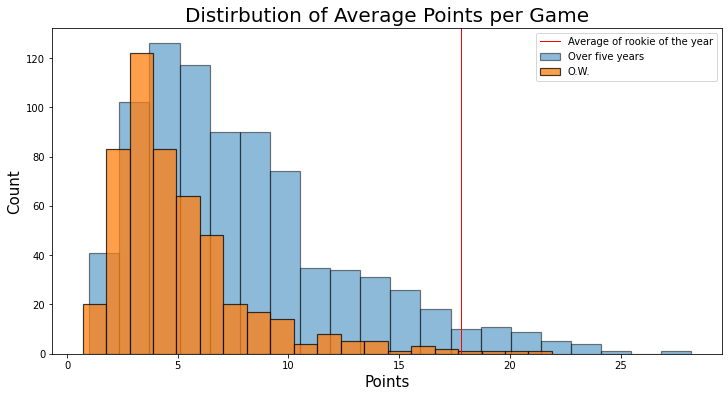

In [406]:
# Points per game
plt.hist(players[players['target_5yrs']==1]['pts'], label = 'Over five years', bins = 20,
        edgecolor='black', linewidth=1.2, alpha = 0.5)
plt.hist(players[players['target_5yrs']==0]['pts'], label = 'O.W.', bins=20,
        edgecolor='black', linewidth=1.2, alpha = 0.75)

plt.title('Distirbution of Average Points per Game', fontsize = 20)
plt.axvline(17.8, color='r', linewidth=1, label='Average of rookie of the year')
plt.xlabel('Points', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()

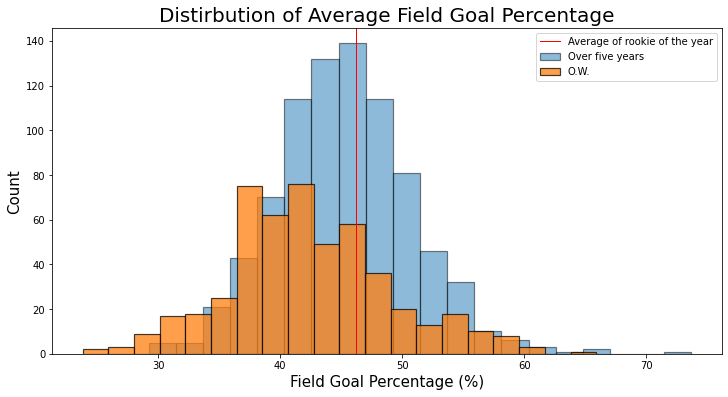

In [411]:
# Field goal percentage
plt.hist(players[players['target_5yrs']==1]['fg'], label = 'Over five years', bins = 20,
        edgecolor='black', linewidth=1.2, alpha = 0.5)
plt.hist(players[players['target_5yrs']==0]['fg'], label = 'O.W.', bins=20,
        edgecolor='black', linewidth=1.2, alpha = 0.75)

plt.title('Distirbution of Average Field Goal Percentage', fontsize = 20)
plt.axvline(46.2, color='r', linewidth=1, label='Average of rookie of the year')
plt.xlabel('Field Goal Percentage (%)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()

### Try PCA to see if pca can improve model performance

In [221]:
# PCA processing
# First, scale the data to the range between 0 and 1
scaler = MinMaxScaler()
scaler.fit(players_X)
player_X_scale = scaler.transform(players_X)

# Getting principal components; Explaied variance over 95%
pca = PCA(n_components=0.99)
pca.fit(player_X_scale)
player_X_pca = pca.transform(player_X_scale)
# I need 19 components to eplain 95% variance 

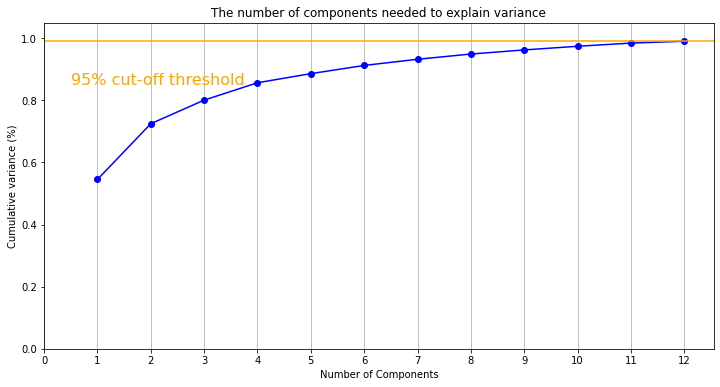

In [33]:
# Visualize the number of principle components to explain variance percentage
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, player_X_pca.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.05)
plt.plot(xi, y, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, player_X_pca.shape[1]+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.99, color='orange', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'orange', fontsize=16)
ax.grid(axis='x')
plt.show()

In [224]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(player_X_pca, players_y, 
                                                    test_size=0.2, random_state=25)

In [35]:
# Decision Tree
tree_grid = {'max_depth':[4,5,6,7],
            'min_samples_split':[2,3,4],
            'max_features':['auto', 'sqrt', 'log2', None]}

DT_gs = GridSearchCV(estimator=DecisionTreeClassifier() , param_grid=tree_grid ,
        scoring='accuracy', cv=5, n_jobs=multiprocessing.cpu_count(), verbose=1)

DT_gs.fit(X_train2, Y_train2)
DT_best = DT_gs.best_estimator_
DT_best.fit(X_train2, Y_train2)

print('Best para: ', DT_gs.best_params_)
print('accuracy: ', accuracy_score(DT_best.predict(X_test2), Y_test2))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best para:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4}
accuracy:  0.6954887218045113


In [99]:
# Random Forest
forest_grid = { 'n_estimators':[150, 250, 500],
               'max_depth':[7,8,9],
               'max_features':['auto', 'sqrt', 'log2', None]
}

RF_gs = GridSearchCV(estimator=RandomForestClassifier() , param_grid=forest_grid ,
        scoring='accuracy', cv=7, n_jobs=multiprocessing.cpu_count(), verbose=1)

RF_gs.fit(X_train2, Y_train2)
RF_best = RF_gs.best_estimator_
RF_best.fit(X_train2, Y_train2)

print('Best para: ', RF_gs.best_params_)
print('accuracy: ', accuracy_score(RF_best.predict(X_test2), Y_test2))

Fitting 7 folds for each of 36 candidates, totalling 252 fits
Best para:  {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 250}
accuracy:  0.6992481203007519


In [96]:
print(classification_report(Y_test2, RF_best.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       115
           1       0.68      0.87      0.77       151

    accuracy                           0.70       266
   macro avg       0.71      0.67      0.67       266
weighted avg       0.70      0.70      0.68       266



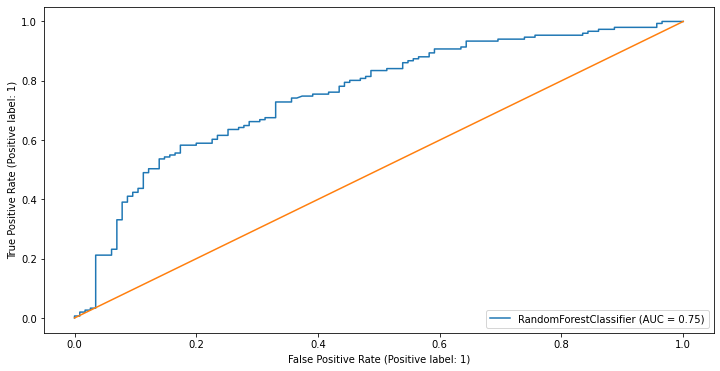

In [37]:
metrics.plot_roc_curve(RF_best, X_test2, Y_test2)
plt.plot([0, 1], [0,1])

## Rookie of The Year

In [384]:
best_rookie = pd.read_csv('rookie_of_the_year.csv')

In [413]:
print('Average points per game: ', best_rookie['PPG'].mean())

Average points per game:  17.79615384615385


In [414]:
print('Average field goal percentage: ;', best_rookie['FG%'].mean())

Average field goal percentage: ; 0.46192307692307694
